[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# MNIST SVM

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 13/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0034ConfMatCrossValidation.ipynb)

In [18]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.svm import LinearSVC, SVC

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [19]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [20]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [21]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotConfusionMatrix, PlotLabelsHistogram, PlotMnistImages

In [22]:
# General Auxiliary Functions



## Exercise - Cross Validation with the SVM

In this exercise we'll apply the Cross Validation manually to find the optimal `C` parameter for the SVM Model.  
Instead of using `cross_val_predict()` we'll do a manual loop on the folds and average the score.

1. Load the [MNIST Data set](https://en.wikipedia.org/wiki/MNIST_database) using `fetch_openml()`.
2. Split the data using Stratified K Fold.
3. For each model (Parameterized by `C`):
    - Train model on the train sub set.
    - Score model on the test sub set.
4. Plot the score per model.
5. Plot the Confusion Matrix of the best model on the training data.

* <font color='brown'>(**#**)</font> Make sure to chose small number of models and folds at the beginning to measure run time and scale accordingly. 
* <font color='brown'>(**#**)</font> We'll use `LinearSVC` class which optimized `SVC` with kernel `linear` as it fits for larger data sets.  
* <font color='brown'>(**#**)</font> You may and should use the functions in the `Auxiliary Functions` section.

In [23]:
# Parameters

numSamples  = 10_000
numImg = 3

maxItr = 5000 #<! For the LinearSVC model

#===========================Fill This===========================#
# 1. Set the number of folds.
# 1. Set the values of the `C` parameter grid.
numFold = 5
lC = np.linspace(0.001, 1 , 10)
print(lC)
#===============================================================#

# Data Visualization


[0.001 0.112 0.223 0.334 0.445 0.556 0.667 0.778 0.889 1.   ]


## Generate / Load Data

The _MNIST_ database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits.  
The MNIST data is a well known data set in Machine Learning, basically it is the _Hello World_ of ML.

The original black and white images from NIST were normalized to fit into a `28x28` pixel bounding box and anti aliased.

* <font color='brown'>(**#**)</font> There is an extended version called [EMNIST](https://arxiv.org/abs/1702.05373).


In [24]:
# Load Data 

#===========================Fill This===========================#
# 1. Load the MNIST Data using `fetch_openml`.
# !! Use the option `parser = auto`.
mX, vY = fetch_openml('mnist_784', version = 1, return_X_y = True, as_frame = False, parser = 'auto')


vY = vY.astype(np.int_) #<! The labels are strings, convert to integer

#===============================================================#

# The data has many samples, for fast run time we'll sub sample it.

vSampleIdx = np.random.choice(mX.shape[0], numSamples)
mX = mX[vSampleIdx, :]
vY = vY[vSampleIdx]

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The features data shape: (10000, 784)
The labels data shape: (10000,)
The unique values of the labels: [0 1 2 3 4 5 6 7 8 9]


In [25]:
# Pre Process Data
# Scaling the data values.

# The image is in the range {0, 1, ..., 255}.
# We scale it into [0, 1].

#===========================Fill This===========================#
# 1. Scale the features value into the [0, 1] range.
# !! Try implementing it in place.

mX = mX / 255.0

#===============================================================#

### Plot Data

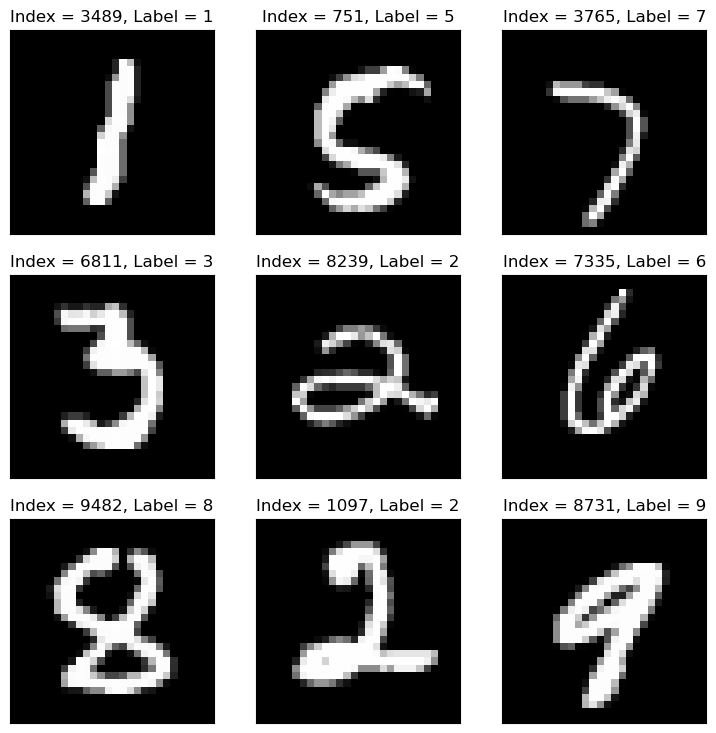

In [26]:
# Plot the Data

hF = PlotMnistImages(mX, vY, numImg)

### Distribution of Labels

When dealing with classification, it is important to know the balance between the labels within the data set.

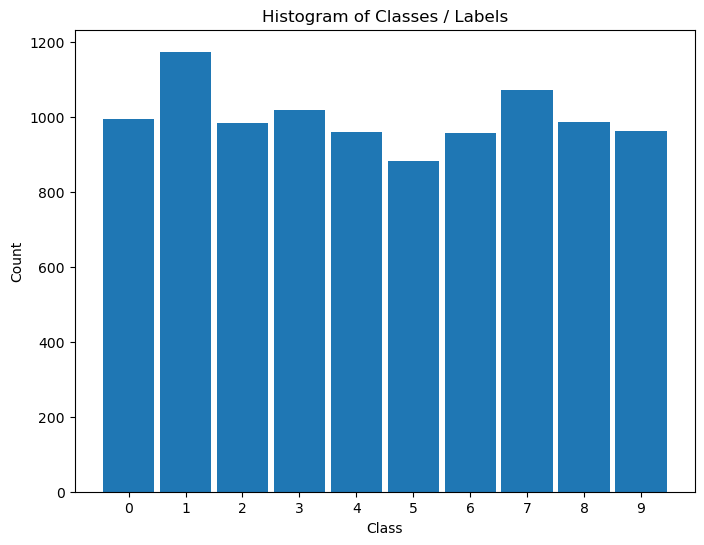

In [27]:
# Distribution of Labels

hA = PlotLabelsHistogram(vY)
plt.show()

* <font color='red'>(**?**)</font> Looking at the _histogram_ of labels, Is the data balanced?

## Cross Validation

The _Cross Validation_ process has 2 main objectives:

1. Estimate the real world performance and its stability.   
2. Optimize the model _Hyper Parameters_. 

### Cross Validation for Hyper Parameter Optimization

We can also use the _Cross Validation_ approach to search for the best _Hype Parameter_.  
The idea is iterating through the data and measure the score we care about.  
The hyper parameter which maximize the score will be used for the production model.

* <font color='red'>(**?**)</font> What kind of a problem is this? Binary Class or Multi Class?
* <font color='red'>(**?**)</font> What kind of strategy will be used? Advise documentation.
* <font color='brown'>(**#**)</font> When using `LinearSVC`:
    *   If #Samples > #Features -> Set `dual = False`.
    *   If #Samples < #Features -> Set `dual = True` (Default).
* <font color='brown'>(**#**)</font> If you experience converging issues with `LinearSVC` use `SVC`.

In [28]:
print(f"numFold: {numFold}")
print(f"lC: {lC}")

numFold: 5
lC: [0.001 0.112 0.223 0.334 0.445 0.556 0.667 0.778 0.889 1.   ]


In [31]:
# Cross Validation for the C parameter
numC = len(lC)
mACC = np.zeros(shape = (numFold, numC)) #<! Accuracy per Fold and Model

oStrCv = StratifiedKFold(n_splits = numFold, random_state = seedNum, shuffle = True)

for ii, (vTrainIdx, vTestIdx) in enumerate(oStrCv.split(mX, vY)):
    print(f'Working on Fold #{(ii + 1):02d} Out of {numFold} Folds')
    #===========================Fill This===========================#
    # example:
    # numFold = 5 ; len(mX) = 10000 ; len(vY) = 10000
    # 10000 / 5 parts = 2000 each part ;
    # len(vTrainIdx) =    8000  = 4 parts
    # len(vTestIdx) =     2000  = 1 part  

    # Setting the Train / Test split
    mXTrain = mX[vTrainIdx]
    vYTrain = vY[vTrainIdx]
    mXTest  = mX[vTestIdx]
    vYTest  = vY[vTestIdx]
    #===============================================================#
    for jj, C in enumerate(lC):
        print(f'Working on Model #{(jj + 1):02d} Out of {numC} Models with C = {C:0.4f}')
        #===========================Fill This===========================#
        # Set the model, train, score
        # Set `max_iter = maxItr`
        # Set `dual = False`
        
        # oSvmCls     = SVC(C = C, kernel = 'linear')
        oSvmCls     = LinearSVC(C = C, max_iter = maxItr, dual = False)

        oSvmCls     = oSvmCls.fit(mXTrain, vYTrain)
        accScore    = oSvmCls.score(mXTest, vYTest)
        #===============================================================#
        mACC[ii, jj] = accScore



Working on Fold #01 Out of 5 Folds
Working on Model #01 Out of 10 Models with C = 0.0010
Working on Model #02 Out of 10 Models with C = 0.1120
Working on Model #03 Out of 10 Models with C = 0.2230
Working on Model #04 Out of 10 Models with C = 0.3340
Working on Model #05 Out of 10 Models with C = 0.4450
Working on Model #06 Out of 10 Models with C = 0.5560
Working on Model #07 Out of 10 Models with C = 0.6670
Working on Model #08 Out of 10 Models with C = 0.7780
Working on Model #09 Out of 10 Models with C = 0.8890
Working on Model #10 Out of 10 Models with C = 1.0000
Working on Fold #02 Out of 5 Folds
Working on Model #01 Out of 10 Models with C = 0.0010
Working on Model #02 Out of 10 Models with C = 0.1120
Working on Model #03 Out of 10 Models with C = 0.2230
Working on Model #04 Out of 10 Models with C = 0.3340
Working on Model #05 Out of 10 Models with C = 0.4450
Working on Model #06 Out of 10 Models with C = 0.5560
Working on Model #07 Out of 10 Models with C = 0.6670
Working on M

* <font color='red'>(**?**)</font> How can we accelerate the above calculation?   
  Think about dependency between the scores, does it exist?

In [33]:
# Model Score

#===========================Fill This===========================#
# 1. Calculate the score per model (Reduction).
# !! Average over the different folds.

vAvgAcc = np.mean(mACC, axis = 0) #<! Accuracy
print(vAvgAcc)
#===============================================================#

[0.8843 0.8988 0.8956 0.8936 0.8925 0.89   0.8887 0.8879 0.8865 0.8859]


* <font color='red'>(**?**)</font> In the above we used the mean as the reduction operator of many results into one. Can you think on other operators?
* <font color='blue'>(**!**)</font> Try using a different reduction method and see results.

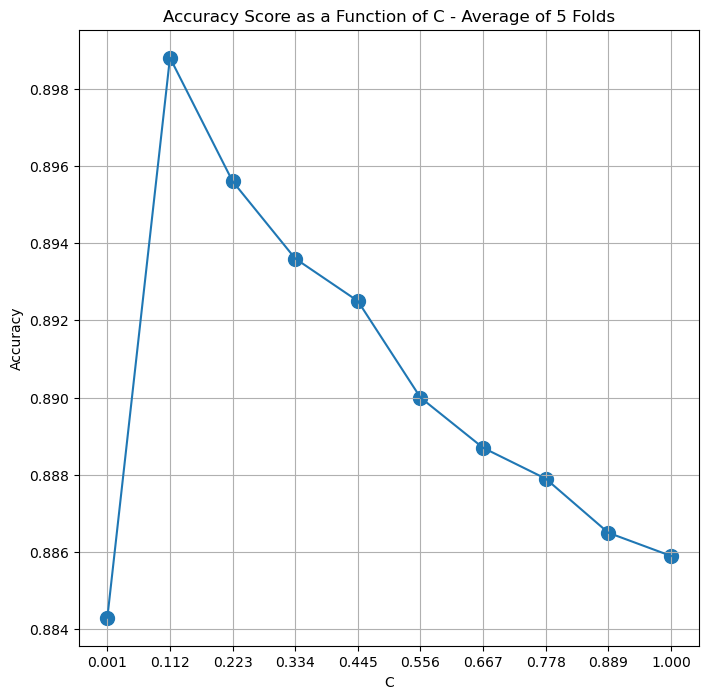

In [34]:
# Plot Results

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA.plot(lC, vAvgAcc)
hA.scatter(lC, vAvgAcc, s = 100)
hA.set_title(f'Accuracy Score as a Function of C - Average of {numFold} Folds')
hA.set_xlabel('C')
hA.set_ylabel('Accuracy')
hA.set_xticks(lC)
hA.grid()

plt.show()

* <font color='red'>(**?**)</font> What range would you choose to do a fine tune over?

## Confusion Matrix

The confusion matrix is almost the whole story for classification problems.  

Train the model with the best parameter on the whole data and plot the _Confusion Matrix_.

In [35]:
# Optimal Parameter

#===========================Fill This===========================#
# Extract the optimal C
# Look at `np.argmax()`

optC = lC[np.argmax(vAvgAcc)] #<! Optimal `C` value 
#===============================================================#

print(f'The optimal C value is C = {optC}')


The optimal C value is C = 0.112


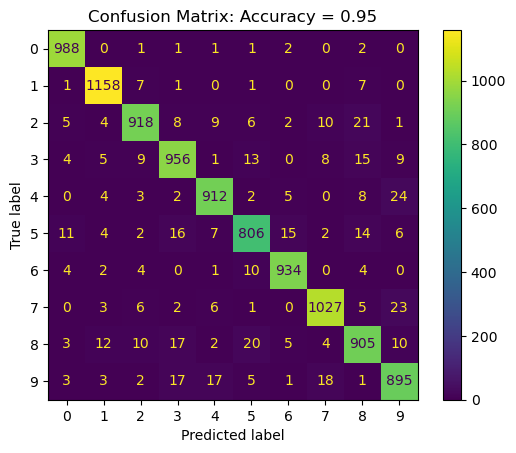

In [36]:
# Plot the Confusion Matrix 

#===========================Fill This===========================#
# 1. Build the SVC model with the best parameter.
# 2. Fit & Predict using the model.
# 3. Calculate the accuracy score.
oSvmCls = LinearSVC(C = optC, max_iter = maxItr, dual = False) #<! The model object
oSvmCls = oSvmCls.fit(mX, vY) #<! Fit to data
vYPred = oSvmCls.predict(mX) #<! Predict on the data
dScore = {'Accuracy': np.mean(vYPred == vY)} #<! Dictionary with the `Accuracy` as its key
#===============================================================#

PlotConfusionMatrix(vY, vYPred, dScore = dScore) #<! The accuracy should be >= than above!
plt.show()

* <font color='red'>(**?**)</font> Is the accuracy above higher or smaller than the one on the _cross validation_? Why?
* <font color='blue'>(**!**)</font> Run the above using `SVC()` instead of `LinearSVC()`.